# Homework 02 - Exploratory Data Analysis in Python
## Author: Sanjay Bhargav Siddi

## 2. Exploring, visualizing, and imputing outliers and missing values (NAs) in a novel data set
####     a) Load and explore a data set with publication quality tables
####     b) Thoroughly diagnose outliers and missing values
####     c) Impute outliers and missing values

### 2.1. Required Setup 

In [1]:
# Import all required libraries
# Data analysis and manipulation
import pandas as pd
# Working with arrays
import numpy as np
# Statistical visualization
import seaborn as sns
# Matlab plotting for Python
import matplotlib.pyplot as plt
# Data analysis
import statistics as stat
import scipy.stats as stats
# Visualizing missing values
import missingno as msno
# Statistical modeling
import statsmodels.api as smx
# Predictive data analysis: process data 
from sklearn import preprocessing as pproc
# Predictive data analysis: outlier imputation
from sklearn.impute import SimpleImputer
# Predictive data analysis: KNN NA imputation
from sklearn.impute import KNNImputer
# Predictive data analysis: experimental iterative NA imputer (MICE)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Predictive data analysis: linear models
from sklearn.linear_model import LinearRegression
# Predictive data analysis: Classifying nearest neighbors
from sklearn import neighbors
# Predictive data analysis: Plotting decision regions
from mlxtend.plotting import plot_decision_regions

# Increase font size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(8, 8)})

# Change theme to "white"
sns.set_style("white")

### 2.2. Loading the Tornado data set 

In [2]:
tornadosData = pd.read_csv('C:/Users/sanja/OneDrive/Desktop/University of Arizona Classes/INFO 523 - Data Mining/HW/hw-02-SanjaySiddi/data/tornados.csv')

### 2.3 Examining the data set and trimming the data

In [3]:
tornadosData.describe()

,om,yr,mo,dy,stf,mag,inj,fat,loss,slat,...,elat,elon,len,wid,ns,sn,f1,f2,f3,f4
count,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,67937.000000,68693.000000,68693.00000,4.152300e+04,68693.000000,...,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000
mean,113201.815542,1991.854061,5.968541,15.930881,29.220255,0.778721,1.418689,0.08931,2.020898e+06,37.129386,...,22.960651,-56.836090,3.489270,107.767633,1.008764,0.991411,104.643952,8.605142,1.687202,0.506791
std,226621.993899,19.565158,2.444656,8.750070,15.013273,0.895790,18.114752,1.47212,3.039588e+07,5.099005,...,18.528144,45.340732,8.247115,206.851267,0.095060,0.092278,96.750296,38.106019,16.681665,9.163194
min,1.000000,1950.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,5.000000e+01,17.721200,...,0.000000,-163.530000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,1976.000000,4.000000,8.000000,18.000000,0.000000,0.000000,0.00000,1.000000e+04,33.180000,...,0.000000,-94.780000,0.120000,20.000000,1.000000,1.000000,37.000000,0.000000,0.000000,0.000000
50%,588.000000,1995.000000,6.000000,16.000000,28.000000,1.000000,0.000000,0.00000,5.000000e+04,37.000000,...,32.550000,-84.720000,0.800000,50.000000,1.000000,1.000000,85.000000,0.000000,0.000000,0.000000
75%,1118.000000,2008.000000,7.000000,24.000000,42.000000,1.000000,0.000000,0.00000,5.000000e+05,40.920000,...,38.650000,0.000000,3.210000,100.000000,1.000000,1.000000,137.000000,0.000000,0.000000,0.000000
max,622080.000000,2022.000000,12.000000,31.000000,78.000000,5.000000,1740.000000,158.00000,2.800100e+09,61.020000,...,61.020000,0.000000,234.700000,4576.000000,3.000000,1.000000,810.000000,820.000000,710.000000,507.000000


In [4]:
tornadosData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

In [5]:
# creating a copy of the tornados data set
data = tornadosData.copy()

# renaming columns for readability
data = data.rename(columns={'om':'Tornado_ID','yr':'Year','mo':'Month','dy':'Day','date':'Date','time':'Time','tz':'Timezone','st':'State','mag':'Magnitude','inj':'Injuries','fat':'Fatality','loss':'Loss','len':'Length','wid':'Width','ns':'States_Affected'})

# removing non-important columns 
data = data.drop(columns=['datetime_utc','stf','slat','slon','elat','elon','f1','f2','f3','f4','sn','fc'])

# filling NaN with 0
data = data.fillna(0)

##### Original dataset

In [6]:
tornadosData.head()

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3,15.8,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0,2.0,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0,0.1,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0,0.1,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0,2.0,37,1,1,101,0,0,0,False


##### Trimmed dataset

In [7]:
data.head()

,Tornado_ID,Year,Month,Day,Date,Time,Timezone,State,Magnitude,Injuries,Fatality,Loss,Length,Width,States_Affected
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,OK,1.0,0,0,50000.0,15.8,10,1
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,NC,3.0,3,0,500000.0,2.0,880,1
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,KY,2.0,0,0,500000.0,0.1,10,1
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,KY,1.0,0,0,500000.0,0.1,10,1
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,MS,1.0,3,0,50000.0,2.0,37,1


##### Creating a sub group  

In [8]:
def loss_group_data(data): 
  if data.Loss >= 0 and data.Loss <= 1000: return "Low loss"
  elif data.Loss > 1000 and data.Loss <= 100000: return "Medium loss" 
  else: return "Huge loss"

# Apply the function to data
data['Loss_group'] = data.apply(loss_group_data, axis = 1)

# What does the data look like
data.head(1000)

,Tornado_ID,Year,Month,Day,Date,Time,Timezone,State,Magnitude,Injuries,Fatality,Loss,Length,Width,States_Affected,Loss_group
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,OK,1.0,0,0,50000.0,15.8,10,1,Medium loss
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,NC,3.0,3,0,500000.0,2.0,880,1,Huge loss
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,KY,2.0,0,0,500000.0,0.1,10,1,Huge loss
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,KY,1.0,0,0,500000.0,0.1,10,1,Huge loss
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,MS,1.0,3,0,50000.0,2.0,37,1,Medium loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,216,1953,6,4,1953-06-04,15:00:00,America/Chicago,FL,1.0,0,0,50.0,0.1,10,1,Low loss
996,217,1953,6,5,1953-06-05,08:45:00,America/Chicago,FL,0.0,0,0,50.0,0.1,10,1,Low loss
997,218,1953,6,5,1953-06-05,10:00:00,America/Chicago,UT,0.0,0,0,0.0,8.0,147,1,Low loss
998,219,1953,6,5,1953-06-05,13:30:00,America/Chicago,TX,0.0,0,0,0.0,0.1,10,1,Low loss


### 2.4 Diagnose Outliers 

In [9]:
# Make a copy of the data 
dataCopy = data.copy()

# Select only numerical columns
dataRed = dataCopy.select_dtypes(include = np.number)

# List of numerical columns
dataRedColsList = dataRed.columns[...]

# For all values in the numerical column list from above
for i_col in dataRedColsList:
  # List of the values in i_col
  dataRed_i = dataRed.loc[:,i_col]
  
  # Define the 25th and 75th percentiles
  q25, q75 = round((dataRed_i.quantile(q = 0.25)), 3), round((dataRed_i.quantile(q = 0.75)), 3)
  
  # Define the interquartile range from the 25th and 75th percentiles defined above
  IQR = round((q75 - q25), 3)
  
  # Calculate the outlier cutoff 
  cut_off = IQR * 1.5
  
  # Define lower and upper cut-offs
  lower, upper = round((q25 - cut_off), 3), round((q75 + cut_off), 3)
  
  # Print the values
  print(' ')
  
  # For each value of i_col, print the 25th and 75th percentiles and IQR
  print(i_col, 'q25=', q25, 'q75=', q75, 'IQR=', IQR)
  
  # Print the lower and upper cut-offs
  print('lower, upper:', lower, upper)

  # Count the number of outliers outside the (lower, upper) limits, print that value
  print('Number of Outliers: ', dataRed_i[(dataRed_i < lower) | (dataRed_i > upper)].count())

 
Tornado_ID q25= 285.0 q75= 1118.0 IQR= 833.0
lower, upper: -964.5 2367.5
Number of Outliers:  14194
 
Year q25= 1976.0 q75= 2008.0 IQR= 32.0
lower, upper: 1928.0 2056.0
Number of Outliers:  0
 
Month q25= 4.0 q75= 7.0 IQR= 3.0
lower, upper: -0.5 11.5
Number of Outliers:  1876
 
Day q25= 8.0 q75= 24.0 IQR= 16.0
lower, upper: -16.0 48.0
Number of Outliers:  0
 
Magnitude q25= 0.0 q75= 1.0 IQR= 1.0
lower, upper: -1.5 2.5
Number of Outliers:  3200
 
Injuries q25= 0.0 q75= 0.0 IQR= 0.0
lower, upper: 0.0 0.0
Number of Outliers:  7758
 
Fatality q25= 0.0 q75= 0.0 IQR= 0.0
lower, upper: 0.0 0.0
Number of Outliers:  1573
 
Loss q25= 0.0 q75= 50000.0 IQR= 50000.0
lower, upper: -75000.0 125000.0
Number of Outliers:  13394
 
Length q25= 0.12 q75= 3.21 IQR= 3.09
lower, upper: -4.515 7.845
Number of Outliers:  8326
 
Width q25= 20.0 q75= 100.0 IQR= 80.0
lower, upper: -100.0 220.0
Number of Outliers:  7443
 
States_Affected q25= 1.0 q75= 1.0 IQR= 0.0
lower, upper: 1.0 1.0
Number of Outliers:  590


### 2.5. Basic Exploration of Missing Values (NA)  

In [10]:
# Table showing the extent of NAs in columns containing them
dataNA = data

for col in dataNA.columns:
    dataNA.loc[dataNA.sample(frac = 0.1).index, col] = np.nan
    
dataNA.isnull().sum()

Tornado_ID         6869
Year               6869
Month              6869
Day                6869
Date               6869
Time               6869
Timezone           6869
State              6869
Magnitude          6869
Injuries           6869
Fatality           6869
Loss               6869
Length             6869
Width              6869
States_Affected    6869
Loss_group         6869
dtype: int64

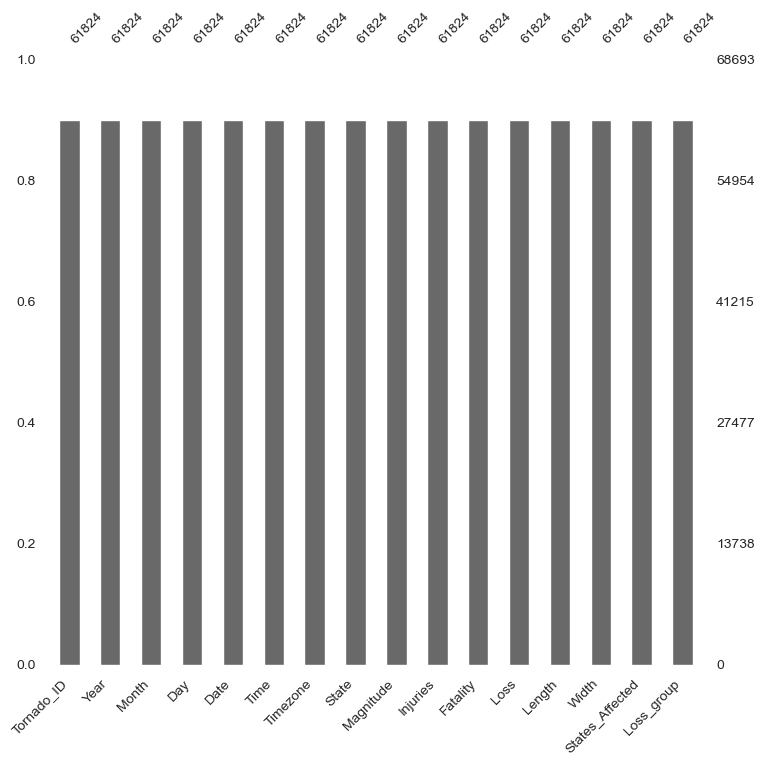

In [11]:
# Bar plot showing all NA values in each column. Since we randomly produced a set amount above the numbers will all be the same.
msno.bar(dataNA, figsize = (8, 8), fontsize = 10)
plt.tight_layout()

### 2.6. Advanced Exploration of Missing Values (NA) 

<Axes: >

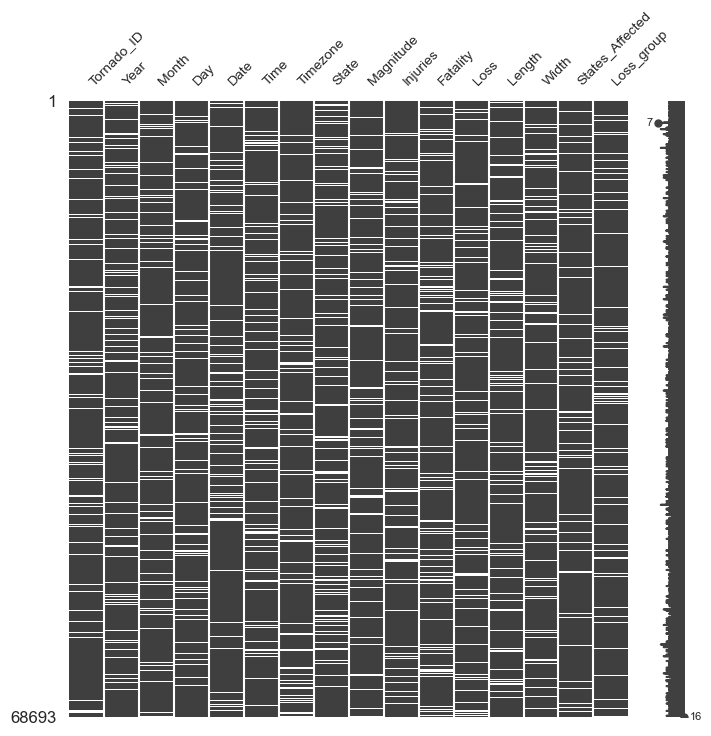

In [12]:
# NA matric
msno.matrix(dataNA, figsize = (8, 8), fontsize = 10)

### 2.7. Classifying Outliers 

[Text(0, 0.5, 'Loss group')]

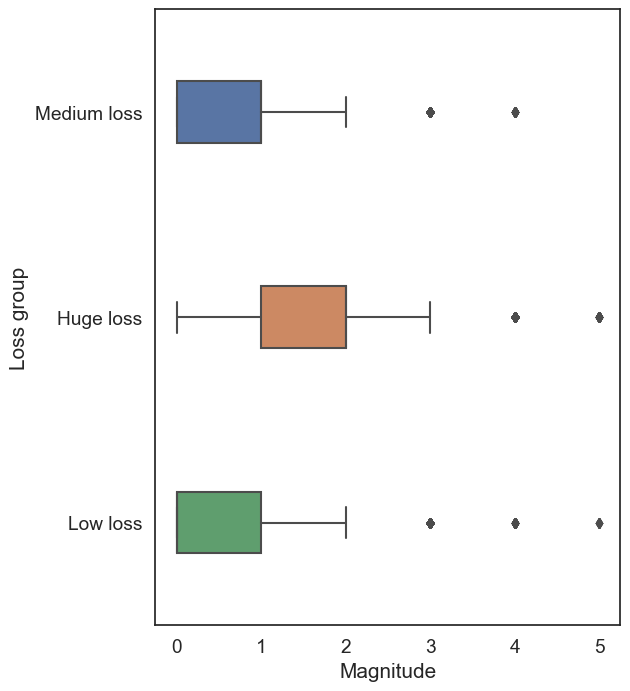

In [13]:
# Increase font size of all seaborn plot elements
sns.set(font_scale = 1.25, rc = {'figure.figsize':(6, 8)})

# Change theme to "white"
sns.set_style("white")

# Box plot
Loss_Box = sns.boxplot(data = data, x = "Magnitude", y = "Loss_group", width = 0.3)

# Tweak the visual presentation
Loss_Box.set(ylabel = "Loss group")

#### All of the below imputated plots are right skewed and have multimodal distributions

In [14]:
# Select only Magnitude
MagMod = data.filter(["Magnitude"], axis = "columns")

### 2.8. Mean Imputation 

In [15]:
# Python can't impute outliers easily, so we will convert them to NAs and imputate them
MagMod.loc[MagMod.Magnitude > 4, 'Magnitude'] = np.nan

# Set mean imputation algorithm
Mean_Impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# Fit imputation
Mean_Impute = Mean_Impute.fit(MagMod[['Magnitude']])

# Transform NAs with the mean imputation
MagMod['Mag_Mean'] = Mean_Impute.transform(MagMod[['Magnitude']])

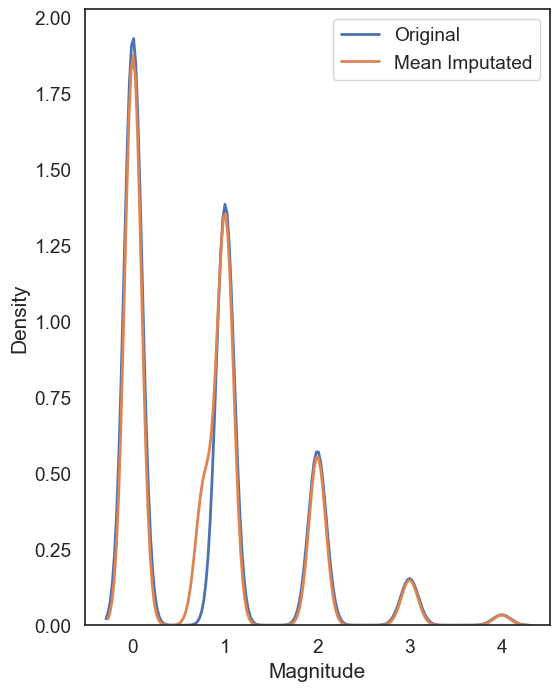

In [16]:
# Visualization of the mean imputation
# Original data
mean_plot = sns.kdeplot(data = MagMod, x = 'Magnitude', linewidth = 2, label = "Original")

# Mean imputation
mean_plot = sns.kdeplot(data = MagMod, x = 'Mag_Mean', linewidth = 2, label = "Mean Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

### 2.9. Median Imputation 

In [17]:
# Python can't impute outliers easily, so we will convert them to NAs and imputate them
MagMod.loc[MagMod.Magnitude > 4, 'Magnitude'] = np.nan

# Set median imputation algorithm
Median_Impute = SimpleImputer(missing_values = np.nan, strategy = 'median')

# Fit imputation
Median_Impute = Median_Impute.fit(MagMod[['Magnitude']])

# Transform NAs with the median imputation
MagMod['Mag_Median'] = Median_Impute.transform(MagMod[['Magnitude']])

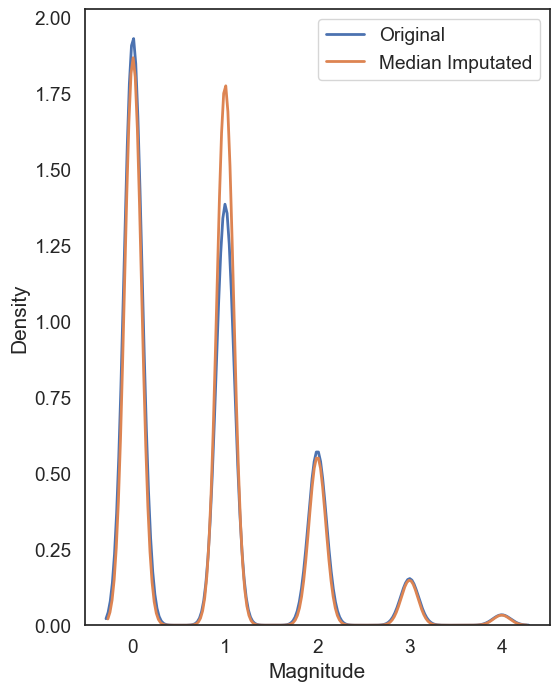

In [18]:
# Visualization of the median imputation
# Original data
median_plot = sns.kdeplot(data = MagMod, x = 'Magnitude', linewidth = 2, label = "Original")

# Median imputation
median_plot = sns.kdeplot(data = MagMod, x = 'Mag_Median', linewidth = 2, label = "Median Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

### 2.10. Mode Imputation 

In [19]:
# Python can't impute outliers easily, so we will convert them to NAs and imputate them
MagMod.loc[MagMod.Magnitude > 4, 'Magnitude'] = np.nan

# Set mode imputation algorithm
Mode_Impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# Fit imputation
Mode_Impute = Mode_Impute.fit(MagMod[['Magnitude']])

# Transform NAs with the mode imputation
MagMod['Mag_Mode'] = Mode_Impute.transform(MagMod[['Magnitude']])

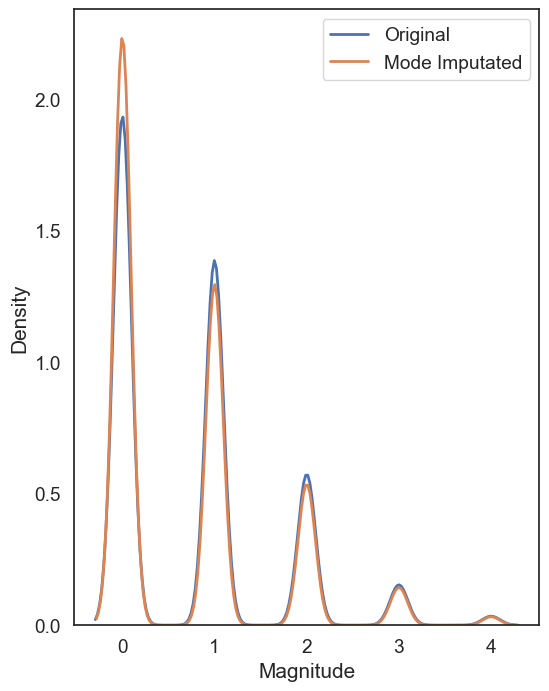

In [20]:
# Visualization of the mode imputation
# Original data
mode_plot = sns.kdeplot(data = MagMod, x = 'Magnitude', linewidth = 2, label = "Original")

# Mode imputation
mode_plot = sns.kdeplot(data = MagMod, x = 'Mag_Mode', linewidth = 2, label = "Mode Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

### 2.11. Capping Imputation 

In [21]:
# Winsorizing deals specifically with outliers, so we don't have to worry about changing outliers to NAs

# New column for capping imputated data at the lowest and highest 10% of values
MagMod['Mag_Cap'] = pd.DataFrame(stats.mstats.winsorize(MagMod['Magnitude'], limits = [0.05, 0.05]))

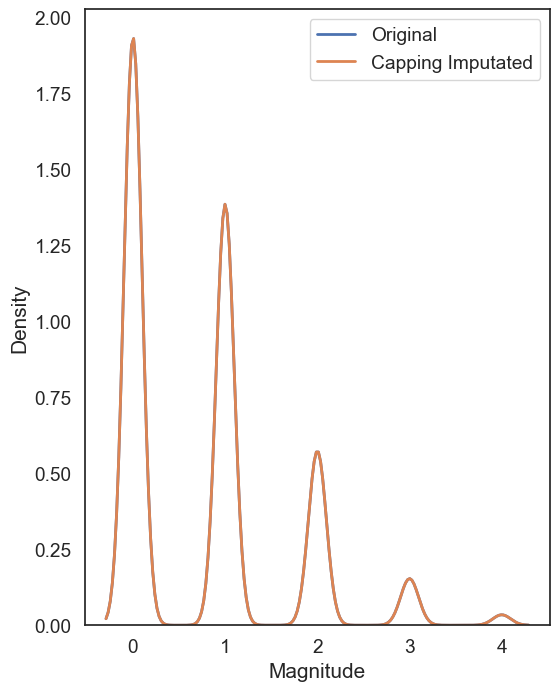

In [22]:
# Visualization of the capping imputation
# Original data
cap_plot = sns.kdeplot(data = MagMod, x = 'Magnitude', linewidth = 2, label = "Original")

# Capping imputation
cap_plot = sns.kdeplot(data = MagMod, x = 'Mag_Cap', linewidth = 2, label = "Capping Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

### 2.12. Imputing NAs 

In [23]:
# Since our normal data has no NA values, we will add the Magnitude column from the dataNA we created earlier and replace the original with it.
# Make a copy of the data 
dataCopy = data.copy()

# Select the Magnitude 
MagNA = dataNA.filter(["Magnitude"], axis = "columns")

# Add Magnitude with NAs to copy of original data
dataCopy['Magnitude'] = MagNA

### K-Nearest Neighbor (KNN) Imputation  

#### || Did not run due to the lack of computational power of my laptop to handle this large dataset ||

##### KNN Imputer 

In [24]:
# Numeric dummy variable from our Loss_group ordinal column
# Define the orginal encoder 
enc = pproc.OrdinalEncoder()

dataCopy = dataCopy.drop(columns=['Date','Time','Timezone','State','Month','Day'])

# Ordinal variable from Age_group column 
dataCopy[['Loss_group']] = enc.fit_transform(dataCopy[['Loss_group']])

In [25]:
dataCopy = dataCopy[['Tornado_ID','Fatality','Loss','Injuries','Length','Width','States_Affected','Loss_group','Magnitude']]

In [26]:
# Min-max schaler
scaler = pproc.MinMaxScaler()

# Scale columns
dataCopy_Scale = pd.DataFrame(scaler.fit_transform(dataCopy), columns = dataCopy.columns)

In [27]:
# Set KNN imputation function parameters
imputer = KNNImputer(n_neighbors = 3)

# Fit imputation
DataKnn = pd.DataFrame(imputer.fit_transform(dataCopy_Scale),columns = dataCopy_Scale.columns)

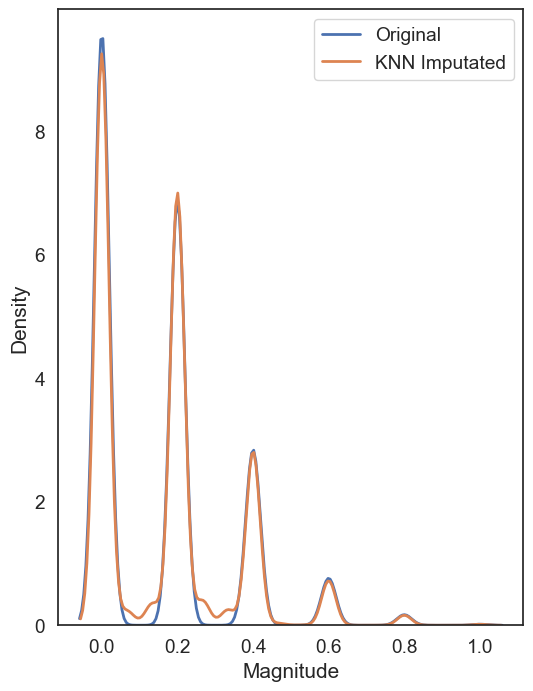

In [28]:
# Add KNN imputated column to original dataCopy
dataCopy_Scale[['MagKnn']] = DataKnn[['Magnitude']]

# Visualization of the KNN imputation
# Original data
knn_plot = sns.kdeplot(data = dataCopy_Scale, x = 'Magnitude', linewidth = 2, label = "Original")

# KNN imputation
knn_plot = sns.kdeplot(data = dataCopy_Scale, x = 'MagKnn', linewidth = 2, label = "KNN Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

### Multivariate Imputation by Chained Equations (MICE) 
##### MICE is an algorithm that fills missing values multiple times, hence dealing with uncertainty better than other methods. This approach creates multiple copies of the data that can then be analyzed and then pooled into a single dataset.

In [29]:
# Assign a regression model
lm = LinearRegression()

# Set MICE imputation function parameters
imputer = IterativeImputer(estimator = lm, missing_values = np.nan, max_iter = 10, verbose = 2, imputation_order = 'roman', random_state = 0)

# Fit imputation
dataMice = pd.DataFrame(imputer.fit_transform(dataCopy),columns = dataCopy.columns)

[IterativeImputer] Completing matrix with shape (68693, 9)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.21
[IterativeImputer] Change: 413409443.4493026, scaled tolerance: 2800100.0 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.41
[IterativeImputer] Change: 68087972.32814474, scaled tolerance: 2800100.0 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.66
[IterativeImputer] Change: 4060642.0062067816, scaled tolerance: 2800100.0 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.86
[IterativeImputer] Change: 2439064.5860954234, scaled tolerance: 2800100.0 
[IterativeImputer] Early stopping criterion reached.


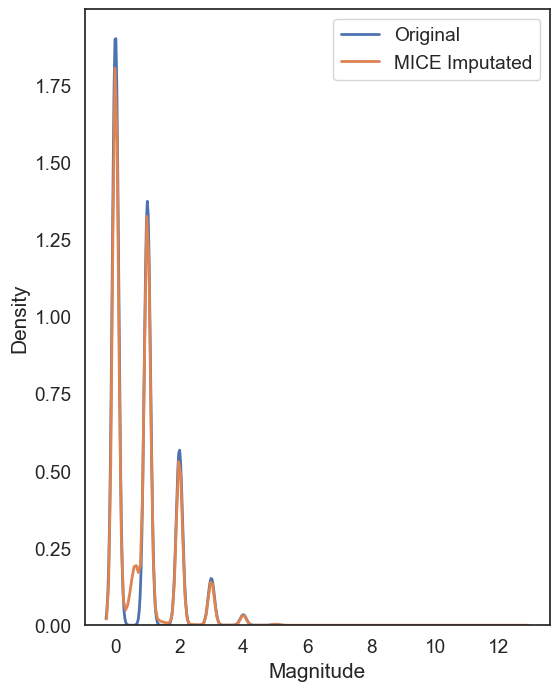

In [30]:
# Add MICE imputated column to original dataCopy
dataCopy[['MagMice']] = dataMice[['Magnitude']]

# Visualization of the MICE imputation
# Original data
mice_plot = sns.kdeplot(data = dataCopy, x = 'Magnitude', linewidth = 2, label = "Original")

# MICE imputation
mice_plot = sns.kdeplot(data = dataCopy, x = 'MagMice', linewidth = 2, label = "MICE Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()